In [38]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Classification

In [39]:
class_df = pd.read_csv('/kaggle/input/banana/banana_quality.csv')
print(class_df.head())

       Size    Weight  Sweetness  Softness  HarvestTime  Ripeness   Acidity  \
0 -1.924968  0.468078   3.077832 -1.472177     0.294799  2.435570  0.271290   
1 -2.409751  0.486870   0.346921 -2.495099    -0.892213  2.067549  0.307325   
2 -0.357607  1.483176   1.568452 -2.645145    -0.647267  3.090643  1.427322   
3 -0.868524  1.566201   1.889605 -1.273761    -1.006278  1.873001  0.477862   
4  0.651825  1.319199  -0.022459 -1.209709    -1.430692  1.078345  2.812442   

  Quality  
0    Good  
1    Good  
2    Good  
3    Good  
4    Good  


In [40]:
# This dataset has no missing values
# class_df.dropna(inplace=True)

# Separate Features and Target Variables
class_X = class_df.drop(columns='Quality')
class_y = class_df['Quality']
class_num_cols = list(class_X.select_dtypes(include=[np.number]).columns.values)
class_cat_cols = list(class_X.select_dtypes(exclude=[np.number]).columns.values)

# Create Train & Test Data
class_X_train, class_X_test, class_y_train, class_y_test = train_test_split(class_X, class_y,test_size=0.3)

### White Box Applied: Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

class_dt = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 2)
class_dt.fit(class_X_train, class_y_train)

# Predict on the test data and evaluate the model
class_y_pred = class_dt.predict(class_X_test)

# Classification Report
print(classification_report(class_y_pred, class_y_test))

              precision    recall  f1-score   support

         Bad       0.87      0.78      0.82      1341
        Good       0.75      0.85      0.80      1059

    accuracy                           0.81      2400
   macro avg       0.81      0.81      0.81      2400
weighted avg       0.82      0.81      0.81      2400



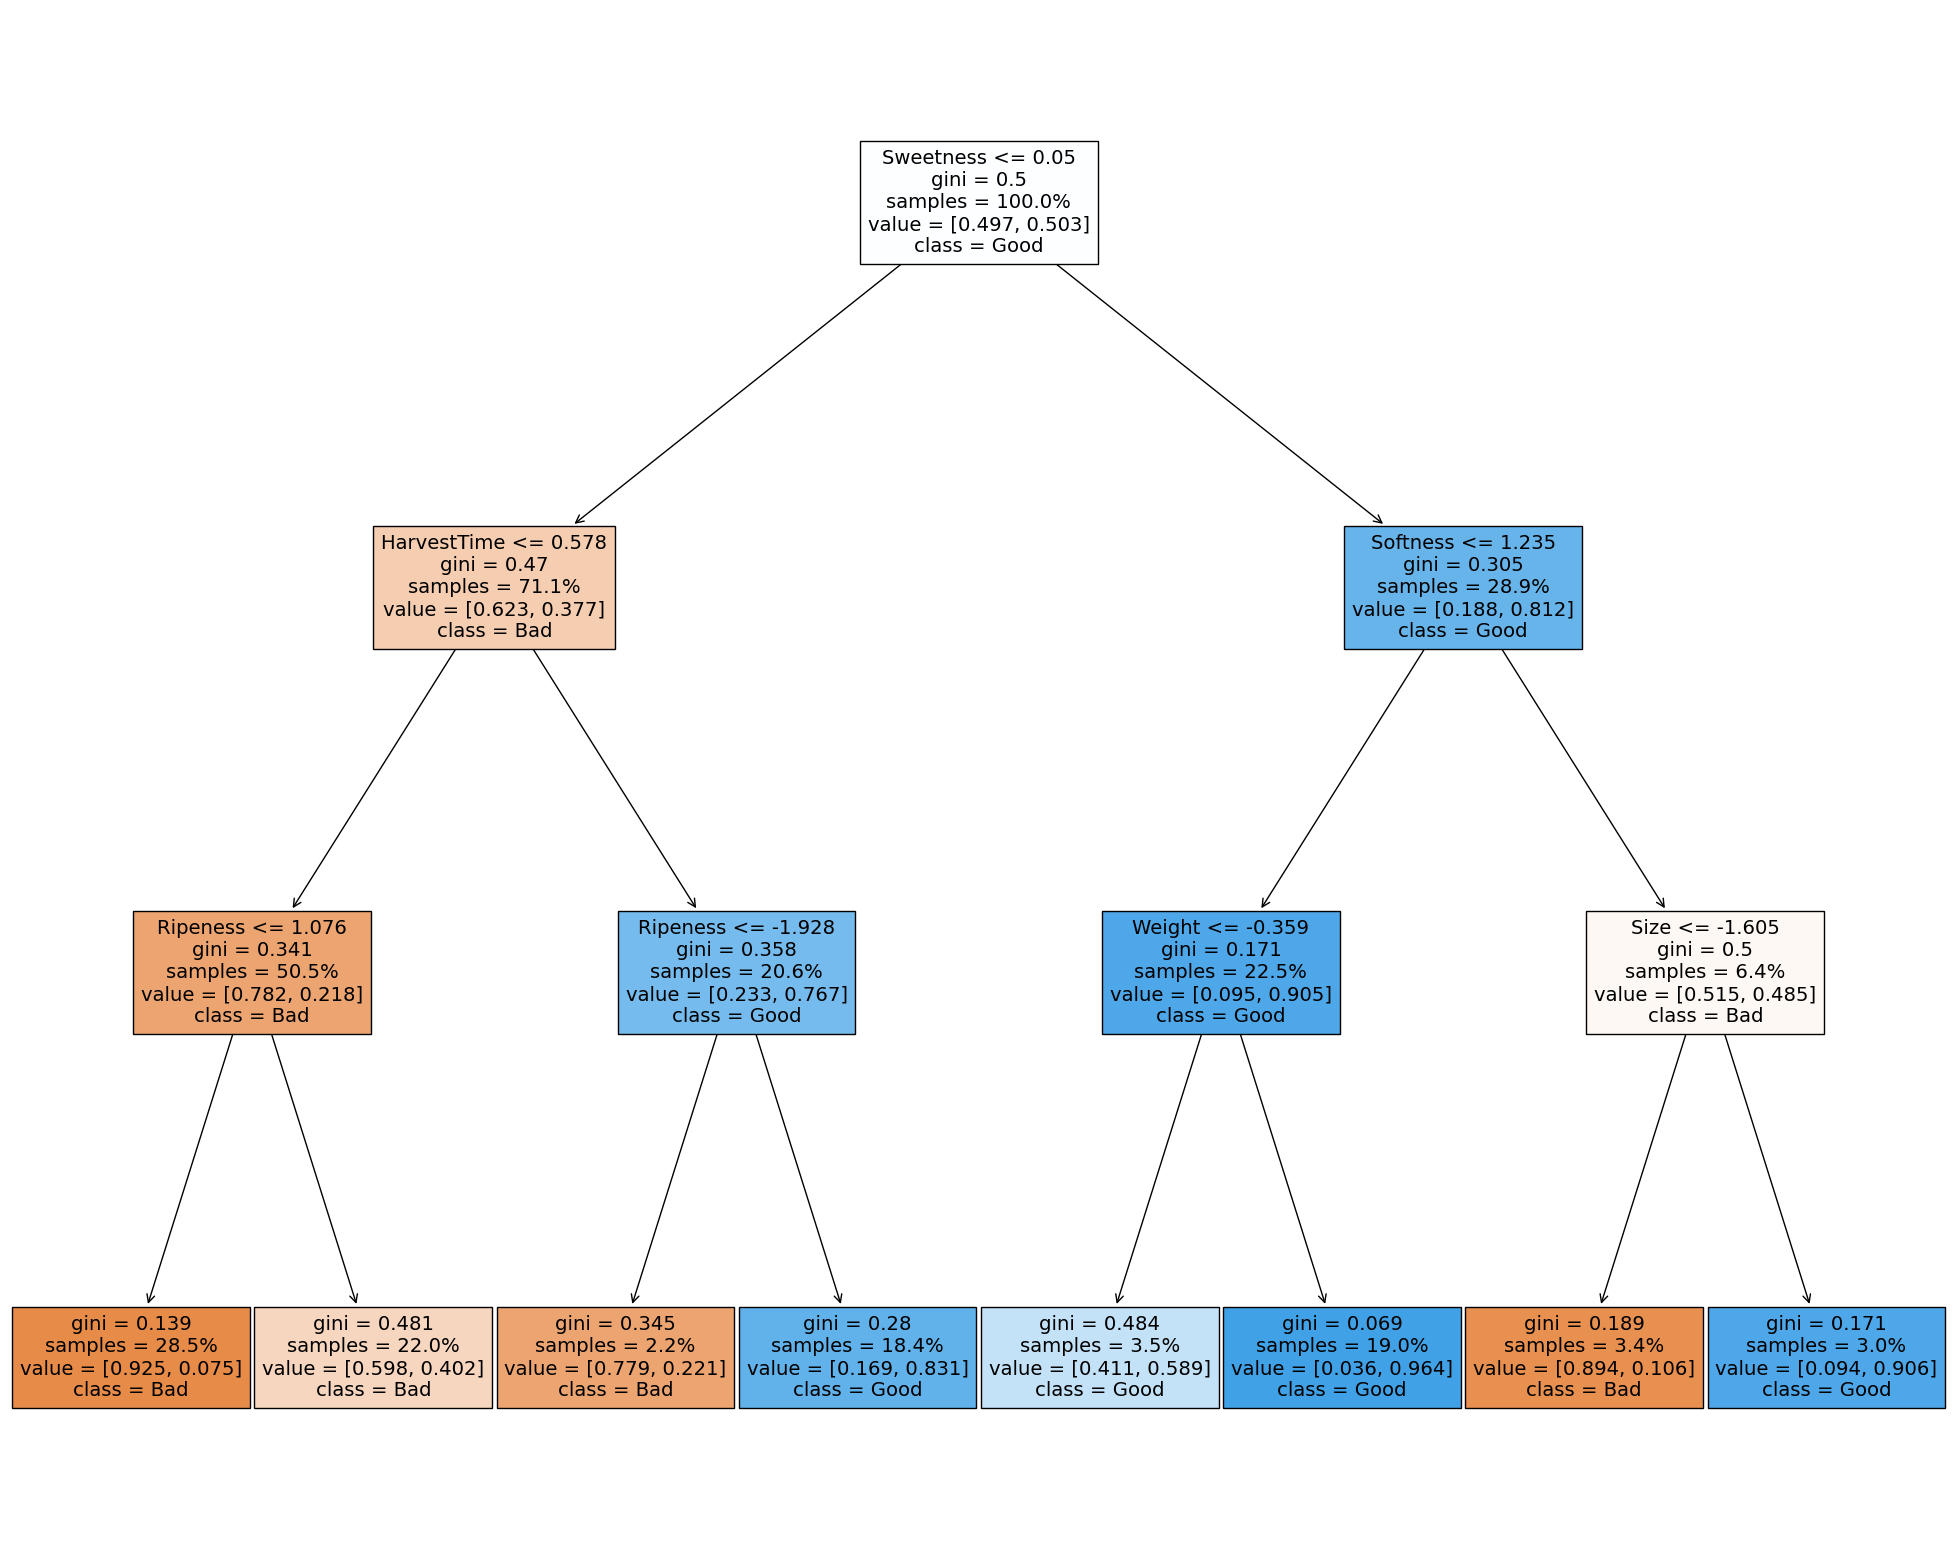

In [42]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(class_dt,
               	feature_names = list(class_X_train.columns),
               	class_names = ['Bad', 'Good'],
               	filled=True, proportion = True)

Each internal node represents a decision or split based on a specific feature value. Each internal node contains
- Feature & Threshold: The feature used for the split and the threshold (e.g., Sweetness <= 0.333).
- Gini Index: A measure of impurity (lower values mean purer splits). A node is pure when all of its records belong to the same class, such nodes known as the leaf node.
- Samples: The percentage of samples at this node.
- Value: The proportion of samples in each class [Bad, Good].
- Class: The predicted class at this node.

Also, the colors in the nodes represent the majority class, with the intensity of the color indicating the proportion of the dominant class within that node.

### Black Box Applied: Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
# Build model
class_rf = RandomForestClassifier(max_features=2, n_estimators =100 ,bootstrap = True)

class_rf.fit(class_X_train, class_y_train)

# Predict on the test data and evaluate the model
class_y_pred = class_rf.predict(class_X_test)

# Classification Report
print(classification_report(class_y_pred, class_y_test))

              precision    recall  f1-score   support

         Bad       0.96      0.97      0.96      1205
        Good       0.96      0.96      0.96      1195

    accuracy                           0.96      2400
   macro avg       0.96      0.96      0.96      2400
weighted avg       0.96      0.96      0.96      2400



# Regression 

In [44]:
reg_df = pd.read_csv('/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv')
print(reg_df.head())

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


In [45]:
# This dataset has no missing values
# reg_df.dropna(inplace=True)

# Split Features (X) and Target (y)
reg_X = reg_df.drop(columns=["Performance Index"])  # Replace 'Target' with actual target column name
reg_y = reg_df["Performance Index"]
reg_num_cols = list(reg_X.select_dtypes(include=[np.number]).columns.values)
reg_cat_cols = list(reg_X.select_dtypes(exclude=[np.number]).columns.values)

In [46]:
from sklearn.preprocessing import OneHotEncoder

# Convert Categorical Data into Numerical (One-Hot Encoding)
encoder = OneHotEncoder(sparse_output=False, drop="first")
encoded_df = pd.DataFrame(
    encoder.fit_transform(reg_X[reg_cat_cols]),
    columns=encoder.get_feature_names_out(reg_cat_cols),
)

reg_X = reg_X.drop(columns=reg_cat_cols).reset_index(drop=True)
reg_X = pd.concat([reg_X, encoded_df], axis=1)

# Split Dataset into Train and Test Sets
reg_X_train, reg_X_test, reg_y_train, reg_y_test = train_test_split(reg_X, reg_y, test_size=0.2, random_state=42)

### White Box Applied: Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression

# Buid & train model
reg_linear = LinearRegression()
reg_linear.fit(reg_X_train, reg_y_train)

# Evaluate model
r2_score = reg_linear.score(reg_X_test, reg_y_test)
print(f"Final model R² Score: {r2_score}")

Final model R² Score: 0.9889832909573145


In [48]:
print("Model coefficients:\n")
for i in range(reg_X.shape[1]):
    print(reg_X.columns[i], "=", reg_linear.coef_[i].round(5))

Model coefficients:

Hours Studied = 2.85248
Previous Scores = 1.01699
Sleep Hours = 0.47694
Sample Question Papers Practiced = 0.19183
Extracurricular Activities_Yes = 0.60862


### Black Box Applied: Neural Network

In [49]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras import Input

def r2_score(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred))  # Residual sum of squares
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))  # Total sum of squares
    return 1 - (SS_res / (SS_tot + K.epsilon()))  # Add epsilon to avoid division by zero

# Define model
reg_neural = model = Sequential([
            Input(shape=(reg_X_train.shape[1],)),  # Define input shape explicitly
            Dense(1000, activation='relu'),# Input layer
            Dropout(0.5),
            Dense(500, activation='relu'), # Hidden layer with 500 neurons and ReLU activation
            Dropout(0.5),
            Dense(250, activation='relu'),
            Dropout(0.5),
            Dense(1, activation='linear') # Output layer with a single neuron (for regression)
        ])

reg_neural.compile(optimizer="adam", loss="mse", metrics=[r2_score])


In [ ]:
# Train model
reg_neural.fit(
    reg_X_train, reg_y_train, 
    validation_data=(reg_X_test, reg_y_test),  # Track performance on test set
    epochs=50,  # Adjust epochs as needed
    batch_size=32,  # Common batch size
    verbose=0  # Show training progress
)

In [ ]:
# Evaluate model
loss, r2 = reg_neural.evaluate(reg_X_test, reg_y_test)
print(f"Test Loss (MSE): {loss:.4f}")
print(f"Final model R² Score: {r2}")

# Counterfactual

In [ ]:
!pip install dice-ml

In [ ]:
import dice_ml
from dice_ml.utils import helpers # helper functions

class_dice_train = pd.concat([class_X_train, class_y_train], axis=1)
print(class_dice_train)


# Dataset for training an ML model
# Continuous features need to be specified as they are perturbed differently
class_d = dice_ml.Data(dataframe=class_dice_train,
                 continuous_features=['Size', 'Weight', 'Sweetness', 'Softness', 'HarvestTime', 'Ripeness', 'Acidity'],
                 outcome_name='Quality')

# Pre-trained ML model
class_m = dice_ml.Model(model=class_rf, backend='sklearn', model_type='classifier')

# DiCE explanation instance
class_exp = dice_ml.Dice(class_d,class_m, method='random')

In [ ]:
# Generate counterfactual examples
query_instance = class_X_test[0:1]
dice_exp = class_exp.generate_counterfactuals(query_instance, total_CFs=3, desired_class="opposite")

# Visualize counterfactual explanation
dice_exp.visualize_as_dataframe(show_only_changes=True)

In order to obtain good quality banana,
- Increase the Size, Sweetness, Softness, HarvestTime, Ripeness

- DiCE allows restricting a list of features to be varied because in some cases, there are some features that are impossible to be changed (e.g, one's age or gender)
- The value range of a particular column can also be restricted.

In [ ]:
query_instance = class_X_test[0:1]
dice_exp = class_exp.generate_counterfactuals(
    query_instance, 
    total_CFs=3,
    desired_class="opposite",
    features_to_vary=['Sweetness', 'Size'],
    permitted_range = {'Size': [-5, 5]}
)

dice_exp.visualize_as_dataframe(show_only_changes=True)

# Lime

### Regression

In [ ]:
from lime import lime_tabular

# Fit the Explainer on the training data set using the LimeTabularExplainer
reg_explainer_lime = lime_tabular.LimeTabularExplainer(reg_X_train.values,
                                                       feature_names=list(reg_X_train.columns),
                                                       class_names=['Performance Index'],
                                                       verbose=True,
                                                       mode='regression' # “classification” or “regression”
                                                      )

verbose
- if true, print local prediction values from the regression model trained on the samples using only the obtained features

In [ ]:
# Calling the explain_instance method by passing in the:
#    1) ith test vector (fourth in this case)
#    2) prediction function used by our prediction model('reg_neural' in this case)
#    3) the top features which we want to see, denoted by k
 
reg_exp_lime = reg_explainer_lime.explain_instance(
    reg_X_test.values[3], reg_neural.predict, num_features=5)
 
# Visualize the explanations
reg_exp_lime.show_in_notebook()

#### Console Output
- Right: Prediction given by neural network (29.953)
- Prediction_local: value outputted by LIME model using only the top 5 features (36.844)

#### Visualisation
The result contains three main pieces of information from left to right: 
- the model’s predictions
- features contributions
- the actual value for each feature.

The fourth student is predicted to have low marks (29.95) because:

- low previous scores
- less sample question papers practiced

### Classification

In [ ]:
class_explainer_lime = lime_tabular.LimeTabularExplainer(class_X_train.values,
                                                         feature_names = list(class_X_train.columns),
                                                         class_names = ['Bad', 'Good'],
                                                         verbose=True, 
                                                         mode='classification')

In [ ]:
class_exp_lime = class_explainer_lime.explain_instance(
    class_X_test.iloc[0], class_rf.predict_proba,
    num_features=5
)
 
class_exp_lime.show_in_notebook()

The first banana is predicted to have good quality with 98% confidence because:

- HarvestTime is less than -2.12
- Size is smaller than -2.26
- Sweetness is higher than -1.03

# SHAP

shape.initjs() function initializes the JavaScript code required to display SHAP visualizations in a notebook environment.

In [ ]:
import shap
shap.initjs()

### Regression

- An explainer is a SHAP object that calculates SHAP values for a given model. It determines how feature contributions are computed.
  - Most of the explainers (e.g., TreeExplainer, LinearExplainer, DeepExplainer) handles feature correlation, but KernelExplainer does not.
- A masker controls how features are hidden or perturbed during SHAP value calculations.
  - In this case, masked features are replaced with random values from reg_X_train

In [ ]:
import shap

# Compute the SHAP values for the linear model
explainer = shap.LinearExplainer(reg_linear, reg_X_train)
shap_values = explainer(reg_X_test)

reg_features = reg_X_train.columns.tolist()

shap.summary_plot(shap_values, reg_X_train, feature_names=reg_features, plot_type="bar")

#### Variable Importance with Summary Plot

In [ ]:
shap.summary_plot(shap_values, reg_X_test)

#### Waterfall Plot
The bottom of a waterfall plot starts as the expected value of the model output (53.991), and then each row shows how the positive (red) or negative (blue) contribution of each feature moves the value from the expected model output over the background dataset to the model output for this prediction (54.712).

In [ ]:
shap.plots.waterfall(shap_values[0])

#### ForcePlot 
Visualize the contribution of features on a sample basis. Each bar represents a feature, the length of the bar represents its contribution to the prediction, and the color indicates the direction of the contribution.

In [ ]:
# 8. Visualize SHAP force plot for the first instance's prediction
shap_values_exp = shap.Explanation(values=shap_values.values, base_values=explainer.expected_value, data=reg_X_test)
shap.force_plot(
    explainer.expected_value,    # Use the scalar base value directly
    shap_values.values[0],       # First instance's SHAP values
    reg_X_test.iloc[0, :]        # Feature values
)

### Classification

In [ ]:
# Create the explainer
class_explainer = shap.TreeExplainer(class_rf)

class_shap_values = class_explainer.shap_values(class_X_test)

#### Variable Importance with Summary Plot
It is observed that the red and blue colors occupy half of the horizontal rectangles for each class. This means that each feature has an equal impact on the classification of both Good and Bad cases.

#### Summary Plot on a Specific Label
BeeSwarm plot allows us to see how each feature's distribution influences predictions based on its own data range. In this plot, each point in the row corresponds to a sample. This visualization helps us better understand where the concentration of features is and how their distribution looks.

- Y-axis represents the features ranked by their average absolute SHAP values.
- X-axis represents SHAP values. Positive values for a given feature push the model’s prediction closer to the label being examined (label=1). In contrast, negative values push towards the opposite class (label=0).

In [ ]:
shap.summary_plot(class_shap_values, class_X_test)

In [ ]:
# class_shap_values[1] is used to represent the SHAP values for instances classified as label 1 (Bad banana quality).
shap.summary_plot(class_shap_values[1], class_X_test)

# Explainable Boosting Machines

In [ ]:
!pip install interpret

In [ ]:
from interpret import set_visualize_provider
from interpret.provider import InlineProvider
set_visualize_provider(InlineProvider())

In [ ]:
from sklearn.metrics import roc_auc_score

from interpret.glassbox import ExplainableBoostingClassifier
from interpret import show

class_ebm = ExplainableBoostingClassifier()
class_ebm.fit(class_X_train, class_y_train)

auc = roc_auc_score(class_y_test, class_ebm.predict_proba(class_X_test)[:, 1])
print("AUC: {:.3f}".format(auc))

The ROC AUC score is the area under the ROC curve, which  plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings.

Ranges from 0 to 1, higher AUC score indicates better performance

In [ ]:
show(class_ebm.explain_global())

In [ ]:
show(class_ebm.explain_local(class_X_test[:5], class_y_test[:5]), 0)

In [ ]:
# To compared multiple model explanations
# show([logistic_regression_global, decision_tree_global])